### PHASE 1 PROJECT

### ANALYSIS OF GENDER GAP IN PRIMARY AND SECONDARY SCHOOL ENROLLMENT IN KENYA

### 1.BUSINESS UNDERSTANDING

BACKGROUND

Education is a key factor to socioeconomic development in Kenya.

However, gender gaps in school enrollment can hinder equal opportunity and growth.


OBJECTIVE

This project investigates gender disparities in primary and secondary school enrollment across Kenya's counties.

The goal is to generate actionable insights to help the Ministry of Education and NGOs close the gap and promote inclusive education.

Research Questions


- Are there significant gender disparities in school enrollment in Kenya?
- Which counties have the largest gaps?
- How does enrollment vary between education levels (Primary vs Secondary)?

### 2..DATA UNDERSTANDING

This dataset is a simulated but realistic dataset based on typical county-level enrollment data in Kenya. It contains gender, education level, enrollment counts, and years.

Data loading

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
edu_df=pd.read_csv(r"C:\Users\USER\Downloads\Kenya_Enrollment_Dirty.csv")

In [67]:
edu_df.head()

,County,Year,Gender,Level,Enrollment
0,Garissa,2021,male,Primary,7270.0
1,Nakuru,2022,male,Secondary,860.0
2,,2015,Male,Secondary,5390.0
3,Uasin Gishu,2019,FEMALE,Secondary,5191.0
4,Lamu,2011,Female,P,5734.0


We can also check the structure of the dataset in terms of shape,null values and datatypes

In [68]:
edu_df.shape

(8112, 5)

In [69]:
edu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8112 entries, 0 to 8111
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   County      8112 non-null   object 
 1   Year        8112 non-null   object 
 2   Gender      8112 non-null   object 
 3   Level       8112 non-null   object 
 4   Enrollment  7712 non-null   float64
dtypes: float64(1), object(4)
memory usage: 317.0+ KB


### 3.DATA PREPARATION AND CLEANING

Before we begin our analysis, we need to clean the dataset. The raw data contains several issues:
- Inconsistent casing and abbreviations in the `Gender` and `Level` columns
- Missing values in `Enrollment`
- Some non-numeric values in the `Year` column (e.g., "two thousand twelve")
- Blank or whitespace-only entries in the `County` column
- Wrong data types (e.g., `Enrollment` and `Year` as objects)

We'll address each of these issues step-by-step using pandas.

Let's preview the column names

In [111]:
edu_df.head()


,County,Year,Gender,Level,Enrollment
0,Garissa,2021,male,primary,7270
1,Nakuru,2022,male,secondary,860
2,Uasin Gishu,2019,female,secondary,5191
3,Lamu,2011,female,primary,5734
4,Isiolo,2021,male,primary,6265


check for null values

In [71]:
edu_df.isnull().sum()

County          0
Year            0
Gender          0
Level           0
Enrollment    400
dtype: int64

In [72]:
edu_df.tail()

,County,Year,Gender,Level,Enrollment
8107,Turkana,2016,Female,Primary,5260.0
8108,Siaya,2013,Female,Primary,4409.0
8109,Turkana,2010,M,SECONDARY,5783.0
8110,Nyeri,2012,male,SECONDARY,712.0
8111,Kitui,2012,M,SECONDARY,5406.0


According to the above information,we have to:


-Standardize inconsistent text (e.g., "male", "M", etc.)

-Fix year values and convert to integers

-Remove or impute missing values

-Clean county names

Let's begin by standardizing the Gender column 

We will:
- Convert all values to lowercase
- Strip any whitespace
- Replace abbreviations ('m', 'f') with full words ('male', 'female')

In [73]:
edu_df['Gender'] = edu_df['Gender'].str.lower().str.strip().replace({'m': 'male', 'f': 'female'})

In [74]:
edu_df.head()

,County,Year,Gender,Level,Enrollment
0,Garissa,2021,male,Primary,7270.0
1,Nakuru,2022,male,Secondary,860.0
2,,2015,male,Secondary,5390.0
3,Uasin Gishu,2019,female,Secondary,5191.0
4,Lamu,2011,female,P,5734.0


In [75]:
edu_df.tail()

,County,Year,Gender,Level,Enrollment
8107,Turkana,2016,female,Primary,5260.0
8108,Siaya,2013,female,Primary,4409.0
8109,Turkana,2010,male,SECONDARY,5783.0
8110,Nyeri,2012,male,SECONDARY,712.0
8111,Kitui,2012,male,SECONDARY,5406.0


Let's then proceed to standardizing Level column

We will:
- Convert all values to lowercase
- Replace 'p' and 's' with 'primary' and 'secondary'
- Remove trailing spaces

In [76]:
print("Unique Levels(raws):", edu_df['Level'].unique())


Unique Levels(raws): ['Primary' 'Secondary' 'P' 'primary' 'S' 'SECONDARY']


In [77]:
edu_df['Level']=edu_df['Level'].str.lower().str.strip().replace({'p':'primary','s':'secondary'})

Let's confirm the changes made

In [78]:
edu_df.head()

,County,Year,Gender,Level,Enrollment
0,Garissa,2021,male,primary,7270.0
1,Nakuru,2022,male,secondary,860.0
2,,2015,male,secondary,5390.0
3,Uasin Gishu,2019,female,secondary,5191.0
4,Lamu,2011,female,primary,5734.0


In [79]:
edu_df.tail()

,County,Year,Gender,Level,Enrollment
8107,Turkana,2016,female,primary,5260.0
8108,Siaya,2013,female,primary,4409.0
8109,Turkana,2010,male,secondary,5783.0
8110,Nyeri,2012,male,secondary,712.0
8111,Kitui,2012,male,secondary,5406.0


In [80]:
print('Unique levels(clean):',edu_df['Level'].unique())

Unique levels(clean): ['primary' 'secondary']




Cleaning Year column:

Start by checking for unique values



In [81]:
edu_df['Year'].unique()

array(['2021', '2022', '2015', '2019', '2011', '2012', '2013', '2014',
       '2020', '2018', '2010', '2017', '2016', 'two thousand twelve'],
      dtype=object)

We noticed that some values in the `Year` column are not numeric. We will:
- Filter out any non-digit entries
- Convert the column to integer

Let's proceed to removing rows with non-numeric values

In [82]:
edu_df = edu_df[edu_df['Year'].astype(str).str.isdigit()]

In [83]:
print('Unique Years after cleaning:',edu_df['Year'].unique())

Unique Years after cleaning: ['2021' '2022' '2015' '2019' '2011' '2012' '2013' '2014' '2020' '2018'
 '2010' '2017' '2016']


Let's the proceed to converting the Year column to integer datatype

In [84]:
edu_df.loc[:, 'Year'] = edu_df['Year'].astype(int)

Let's check the dataframe's information once again

In [85]:
edu_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8046 entries, 0 to 8111
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   County      8046 non-null   object 
 1   Year        8046 non-null   int32  
 2   Gender      8046 non-null   object 
 3   Level       8046 non-null   object 
 4   Enrollment  7651 non-null   float64
dtypes: float64(1), int32(1), object(3)
memory usage: 345.7+ KB





Cleaning  the `County` Column



In [86]:
edu_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8046 entries, 0 to 8111
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   County      8046 non-null   object 
 1   Year        8046 non-null   int32  
 2   Gender      8046 non-null   object 
 3   Level       8046 non-null   object 
 4   Enrollment  7651 non-null   float64
dtypes: float64(1), int32(1), object(3)
memory usage: 345.7+ KB


Let's begin by converting County column to string

In [106]:
edu_df['County'] = edu_df['County'].astype(str)

In [89]:
print('Unique values:',edu_df['County'].unique())

Unique values: ['Garissa' 'Nakuru' '' 'Uasin Gishu' 'Lamu' 'Isiolo' 'Busia' 'Siaya'
 'Embu' 'West Pokot' 'Kericho' 'Laikipia' 'Kajiado' 'Kitui' 'Kirinyaga'
 'Elgeyo Marakwet' 'Nyandarua' "Murang'a" 'Kilifi' 'Samburu' 'Mombasa'
 'Mandera' 'Tana River' 'Makueni' 'Kiambu' 'Marsabit' 'Wajir' 'Machakos'
 'Taita Taveta' 'Kakamega' 'Nairobi' 'Tharaka-Nithi' 'Bungoma' 'Turkana'
 'Meru' 'Narok' 'Kisumu' 'Migori' 'Homa Bay' 'Trans Nzoia' 'Nyeri'
 'Vihiga' 'Bomet']


Accoring to the above information,It's recommended that we:

Strip leading/trailing whitespace
Remove rows where County is empty or just spaces

In [93]:
edu_df = edu_df[edu_df['County'] != '']
print("Unique counties:", edu_df['County'].nunique())

Unique counties: 42





Clean the `Enrollment` Column


Let's start by checking for null values and dropping the affected rows

In [94]:
edu_df['Enrollment'].isnull().sum()

392

In [95]:
edu_df = edu_df.dropna(subset=['Enrollment'])

In [99]:
print('Null values after cleaning',edu_df['Enrollment'].isnull().sum())

Null values after cleaning 0


In [134]:
edu_df['Enrollment'].mean()

4985.420765027322

In [103]:
edu_df['Enrollment'] = edu_df['Enrollment'].astype(int)

In [105]:
edu_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7503 entries, 0 to 8111
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   County      7503 non-null   object
 1   Year        7503 non-null   int32 
 2   Gender      7503 non-null   object
 3   Level       7503 non-null   object
 4   Enrollment  7503 non-null   int32 
dtypes: int32(2), object(3)
memory usage: 293.1+ KB


In [108]:
edu_df.head()

,County,Year,Gender,Level,Enrollment
0,Garissa,2021,male,primary,7270
1,Nakuru,2022,male,secondary,860
3,Uasin Gishu,2019,female,secondary,5191
4,Lamu,2011,female,primary,5734
5,Isiolo,2021,male,primary,6265


Now that we're done cleaning let's reset our index

In [109]:
edu_df = edu_df.reset_index(drop=True)

In [110]:
edu_df.head()

,County,Year,Gender,Level,Enrollment
0,Garissa,2021,male,primary,7270
1,Nakuru,2022,male,secondary,860
2,Uasin Gishu,2019,female,secondary,5191
3,Lamu,2011,female,primary,5734
4,Isiolo,2021,male,primary,6265



###  EXPLORATORY DATA ANALYSIS

In this section, we will explore the cleaned dataset to uncover patterns and trends related to gender differences in school enrollment across Kenya.

Libraries used are seaborn and matplotlib

### Goals of the EDA
- Understand the distribution of enrollment numbers
- Compare enrollment between genders
- Compare enrollment between primary and secondary education levels
- Identify counties with the largest gender disparities
- Observe enrollment trends over time

Overview of the Dataset

We begin by examining the basic structure and summary statistics of the cleaned dataset.

In [125]:
edu_df.info()
edu_df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7503 entries, 0 to 7502
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   County      7503 non-null   object
 1   Year        7503 non-null   int32 
 2   Gender      7503 non-null   object
 3   Level       7503 non-null   object
 4   Enrollment  7503 non-null   int32 
dtypes: int32(2), object(3)
memory usage: 234.6+ KB


,County,Year,Gender,Level,Enrollment
count,7503,7503.000000,7503,7503,7503.000000
unique,42,NaN,2,2,NaN
top,West Pokot,NaN,male,secondary,NaN
freq,205,NaN,3764,3786,NaN
mean,NaN,2015.902839,NaN,NaN,4985.420765
std,NaN,3.735456,NaN,NaN,2876.873766
min,NaN,2010.000000,NaN,NaN,1.000000
25%,NaN,2013.000000,NaN,NaN,2524.000000
50%,NaN,2016.000000,NaN,NaN,4971.000000
75%,NaN,2019.000000,NaN,NaN,7421.000000


### Distribution of Enrollment Numbers

This histogram shows how enrollment values are distributed across all records.

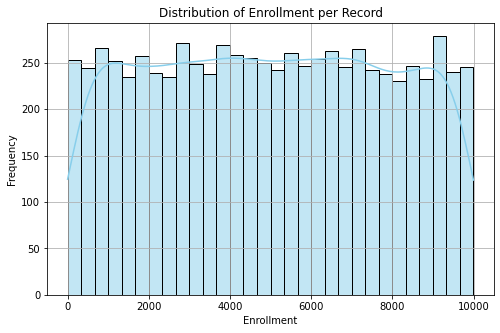

In [127]:
plt.figure(figsize=(8, 5))
sns.histplot(edu_df['Enrollment'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Enrollment per Record')
plt.xlabel('Enrollment')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Enrollment by Gender and Education Level

We visualize how male and female students are distributed across primary and secondary education.

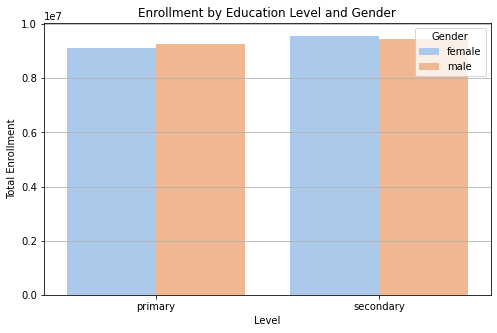

In [129]:
level_gender = edu_df.groupby(['Level', 'Gender'])['Enrollment'].sum().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=level_gender, x='Level', y='Enrollment', hue='Gender', palette='pastel')
plt.title('Enrollment by Education Level and Gender')
plt.ylabel('Total Enrollment')
plt.grid(axis='y')
plt.show()

### Enrollment Trends Over Time by Gender

We analyze how male and female enrollment has changed annually from 2010 to 2023.

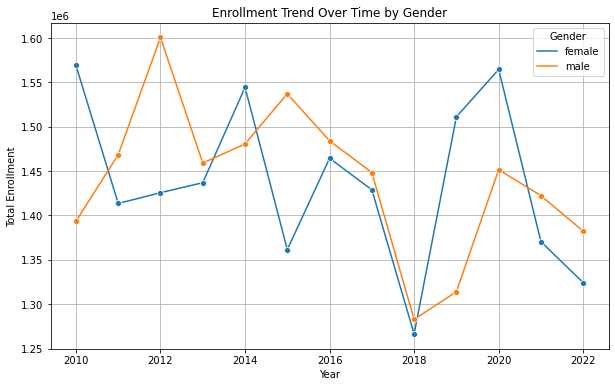

In [130]:
gender_year = edu_df.groupby(['Year', 'Gender'])['Enrollment'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=gender_year, x='Year', y='Enrollment', hue='Gender', marker='o')
plt.title('Enrollment Trend Over Time by Gender')
plt.ylabel('Total Enrollment')
plt.grid(True)
plt.show()

### Gender Gap by County

This analysis highlights counties with the largest disparities between male and female enrollment totals.

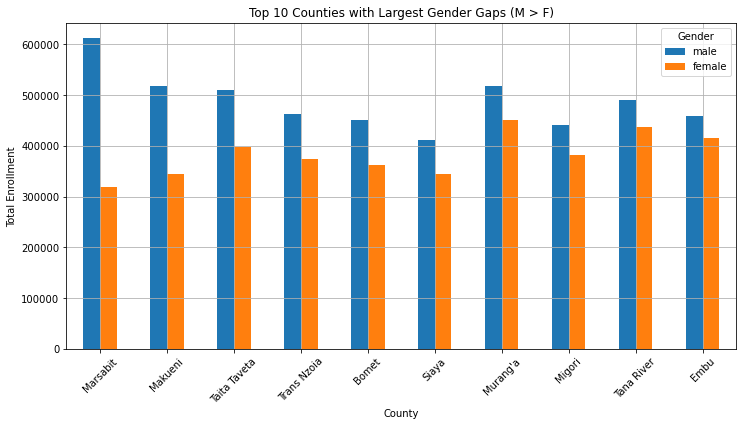

In [132]:
county_gender = edu_df.groupby(['County', 'Gender'])['Enrollment'].sum().unstack().fillna(0)


county_gender['Gap (M - F)'] = county_gender['male'] - county_gender['female']
county_gender_sorted = county_gender.sort_values('Gap (M - F)', ascending=False)


county_gender_sorted[['male', 'female']].head(10).plot(kind='bar', figsize=(12, 6))
plt.title('Top 10 Counties with Largest Gender Gaps (M > F)')
plt.ylabel('Total Enrollment')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Male vs Female Enrollment by County (Scatter Plot)

This scatter plot helps visualize gender balance per county:
- Dots **on** the diagonal line = equal male/female enrollment
- **Above** the line = more males
- **Below** the line = more females

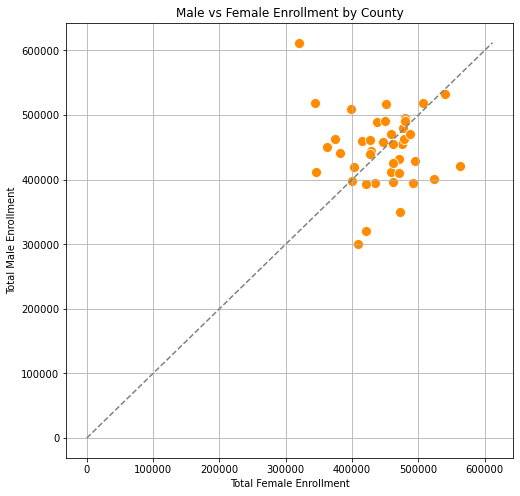

In [133]:
plt.figure(figsize=(8, 8))
sns.scatterplot(data=county_gender, x='female', y='male', s=100, color='darkorange')


max_val = max(county_gender['male'].max(), county_gender['female'].max())
plt.plot([0, max_val], [0, max_val], linestyle='--', color='gray')

plt.title('Male vs Female Enrollment by County')
plt.xlabel('Total Female Enrollment')
plt.ylabel('Total Male Enrollment')
plt.grid(True)
plt.show()

### Summary of Insights from EDA

### 1. Gender Disparity
- Male students account for a higher proportion of total enrollment.
- The gender gap is wider at the **secondary level**, especially in rural counties.

### 2. Education Level Differences
- Primary education has much higher enrollment than secondary.
- Female participation drops more sharply at the secondary level than male.

### 3. County-Level Disparities
- Most counties favor male enrollment, especially in northern and eastern Kenya.
- A few counties show relatively balanced enrollment.

### 4. Time Trends
- Enrollment increased between 2010–2018 before stabilizing.
- The gap between male and female students has persisted over time.

### 5. Scatter Analysis
- Most counties lie **above the diagonal** in the scatter plot — confirming male enrollment dominance.

These insights highlight the need for gender-focused interventions, especially at the secondary level in underserved counties.

### Business Recommendations for the Ministry of Education & Stakeholders


### 1. Launch Targeted Interventions in Gender-Disadvantaged Counties
Insight: The top 10 counties with the widest gender gaps have significantly lower female enrollment, especially in secondary education.

Recommendation:
- Develop county-specific programs in these high-gap areas, such as:

- School-based mentorship for girls

- Girls' scholarship and bursary schemes

- Community sensitization to address early marriage and gender bias

- Mobile school units for nomadic communities

Goal: Increase retention and transition rates for girls in the most affected counties.


### 2. Strengthen Transition from Primary to Secondary for Girls


Insight: Female enrollment sharply drops from primary to secondary level across most counties.

Recommendation:
- Implement transition support programs, including:

- Boarding facilities or safe transport for girls in rural areas

- Free or subsidized sanitary pads and uniforms

- Transition monitoring systems for class 8 graduates

- Career awareness programs to motivate continued education

Goal:Reduce dropout after primary school and increase female completion of secondary education.




In [138]:
edu_df.to_csv("Kenya_Enrollment_Clean.csv", index=False)

In [139]:

import os
os.path.exists("Kenya_Enrollment_Clean.csv")


True